Guide: https://colab.research.google.com/drive/1o5A5dNhamjcOEgaA9FKM4OmlAZS84Z5o#scrollTo=f8f60b87
Exercise: https://4geeks.com/es/syllabus/spain-ds-pt-3/project/tutorial-de-proyecto-de-regresion-lineal

📝 Instrucciones
Predecir el coste del seguro médico de una persona
La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisológicos de sus clientes cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo. Calcular el coste del seguro médico de una persona (Charges) en funcion de los datos fisológicos de sus clientes, es decir, la prima que debe asumir cada uno de los clientes.

Variables:

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numerico)

Data Ingestion

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
total_data = pd.read_csv(url)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Stage 1: Analisis Estadístico de los datos

🕵️‍♀️Paso 1. Exploracion y limpieza de datos

In [2]:
# Obtener las dimensiones
total_data.shape

(1338, 7)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


✅Existen un total de 1338 filas distribuidas en 7 columnas. Entre las que encontramos la clase target a predecir, charges 
✅Los datos cuenta con 4 características númericas y 3 categóricas

In [4]:
#Eliminación de valores duplicados
duplicates = total_data[total_data.duplicated()]
print("Valores duplicados:")
print(duplicates)

total_data = total_data.drop_duplicates()
print("Valores duplicados eliminados:")

Valores duplicados:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Valores duplicados eliminados:


In [6]:
#Eliminación de información relevante
#En este caso no aplica 👉 Mantenemos todas las columas de dataset

Análisis de medidas de tendencia central, dispersión, posición y formas

Optativo: Valores Únicos. 

In [5]:
#Método 1
for column in total_data.columns:
    column_sum = total_data[column].sum()
    print(f"Suma de los valores en la columna {column}: {column_sum}")


Suma de los valores en la columna age: 52440
Suma de los valores en la columna sex: femalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalema

In [6]:
#Metodo lambda
# Define la función lambda
sum_column_lambda = lambda column: f"Suma de los valores en la columna {column}: {total_data[column].sum()}"

# Aplica la función lambda a cada columna usando map
result = list(map(sum_column_lambda, total_data.columns))

# Imprime los resultados
for res in result:
    print(res)

Suma de los valores en la columna age: 52440
Suma de los valores en la columna sex: femalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalema

In [7]:
total_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Alternativa a .describe() para trabajar de forma mas detallada
#Análisis de media, moda, std y percentiles sobre los valores numéricos
total_data = pd.DataFrame(total_data)

# Filtra solo las columnas numéricas
columnas_numericas = total_data.select_dtypes(include=['int64', 'float64'])

columnas_numericas.describe() #atajo

# Media
media = columnas_numericas.mean()
print("Media:")
print(media)

# Moda
moda = columnas_numericas.mode().iloc[0]  # Puede haber múltiples modas
print("\nModa:")
print(moda)

# Desviación Estándar
desviacion_estandar = columnas_numericas.std()
print("\nDesviación Estándar:")
print(desviacion_estandar)

# Percentiles
percentiles = [0.25, 0.50, 0.75]
percentiles_resultados = columnas_numericas.quantile(percentiles)
print("\nPercentiles:")
print(percentiles_resultados)

Media:
age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64

Moda:
age           18.0000
bmi           32.3000
children       0.0000
charges     1121.8739
Name: 0, dtype: float64

Desviación Estándar:
age            14.044333
bmi             6.100468
children        1.205571
charges     12110.359656
dtype: float64

Percentiles:
       age    bmi  children      charges
0.25  27.0  26.29       0.0   4746.34400
0.50  39.0  30.40       1.0   9386.16130
0.75  51.0  34.70       2.0  16657.71745


🕵️‍♀️ Stage 2: Análisis exploratorio de datos

2.1 Análisis univariante (columna a columna)

In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Análisis univariable categórico

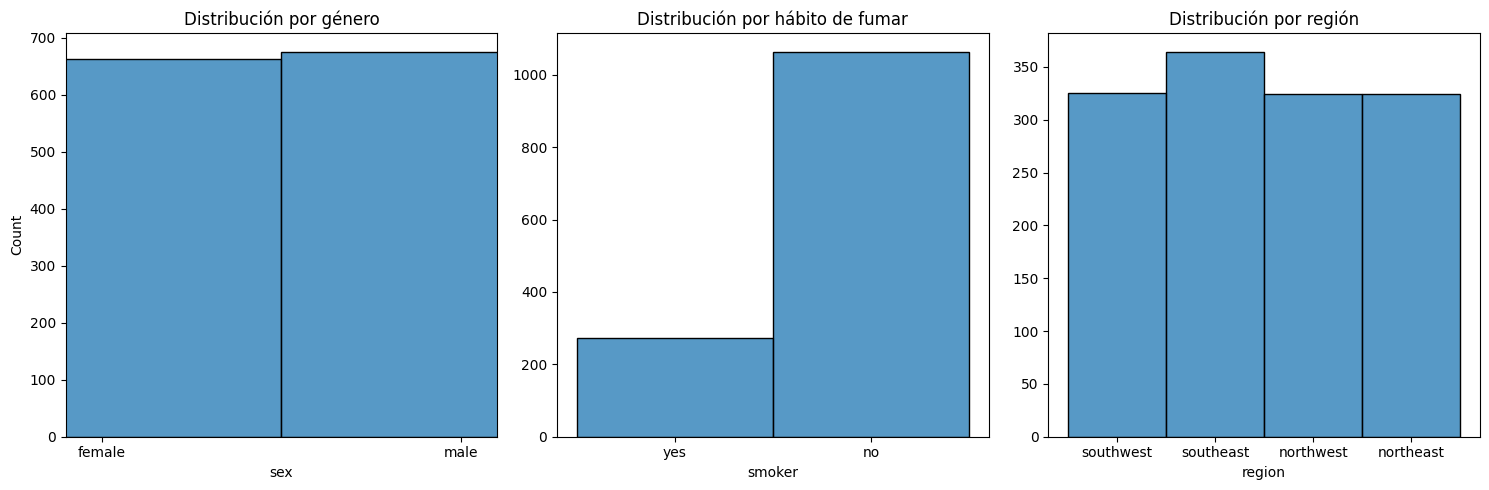

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un subplot con tres histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para 'sex'
sns.histplot(ax=axes[0], data=total_data, x="sex").set_xlim(-0.1, 1.1)
axes[0].set_title('Distribución por género')

# Histograma para 'smoker'
sns.histplot(ax=axes[1], data=total_data, x="smoker").set(ylabel=None)
axes[1].set_title('Distribución por hábito de fumar')

# Histograma para 'region'
sns.histplot(ax=axes[2], data=total_data, x="region").set(ylabel=None)
axes[2].set_title('Distribución por región')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Conclusiones del análisis univariable categórico (Número de repeticiones)

✅La distribución por género es bastante similar, si bien que la muestra de hombres es sensiblemente superior a la muestra de mujeres,
✅La ditribución por hábito de fumar es significativa, el número de no fumadores casi cuadriplica al de fumadores
✅La distribución por regíon es simetrica entre southwest, northwest y northeast y es sensiblemente superior en el caso de southeast

Análisis univariable numérico

In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


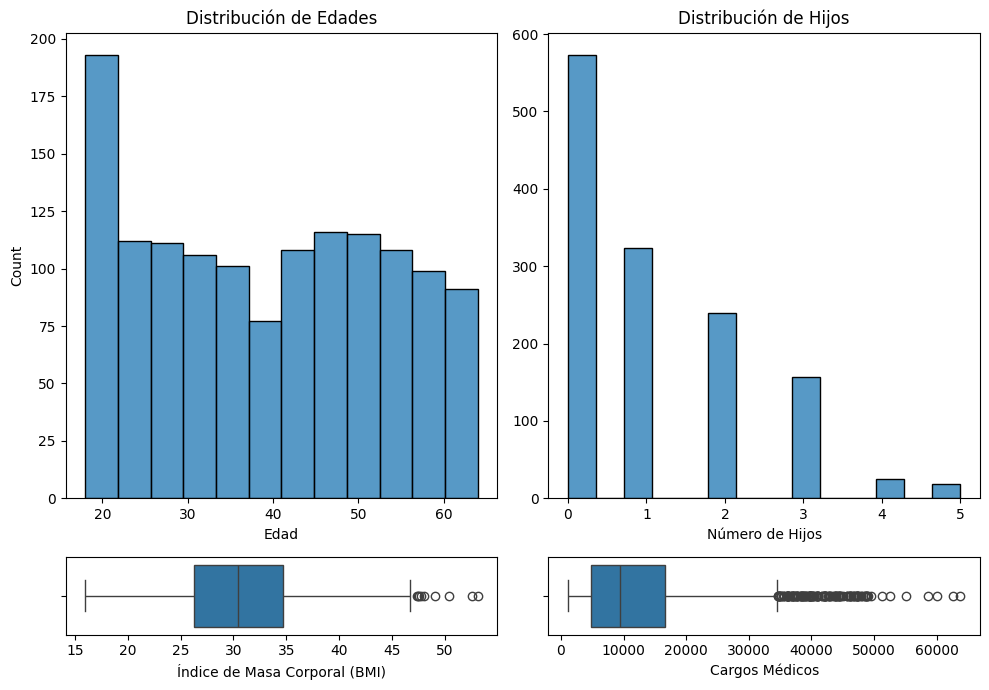

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Histograma para 'age'
sns.histplot(ax=axis[0, 0], data=total_data, x="age").set(xlabel=None)
axis[0, 0].set_title('Distribución de Edades')
axis[0, 0].set_xlabel('Edad')

# Boxplot para 'bmi'
sns.boxplot(ax=axis[1, 0], data=total_data, x="bmi")
axis[1, 0].set_xlabel('Índice de Masa Corporal (BMI)')

# Histograma para 'children'
sns.histplot(ax=axis[0, 1], data=total_data, x="children").set(xlabel=None, ylabel=None)
axis[0, 1].set_title('Distribución de Hijos')
axis[0, 1].set_xlabel('Número de Hijos')

# Boxplot para 'charges'
sns.boxplot(ax=axis[1, 1], data=total_data, x="charges")
axis[1, 1].set_xlabel('Cargos Médicos')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Conclusiones del análisis univariable numérico:

✅Edad: Claramente aparecen un mayor número de veinteañeros en la muestra
✅Número de hijos: La muestra contiene un mayor número de 0 hijos y va decreciendo
✅BMI: Parecen existir outliers entre 47 y 57 
✅Cargos Médicos (charges): La mayor concentración se produce entre 10000 y 15000, existiendo outliers por encima de 60000, parecen no existir valroes entre 15000 y 35000

2.2 Análisis multivariante (Análisis de variables en relación con la predictora, es decir dependiente con independientes)

In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Análisis numérico numerico
Utilizaremos la variable charges para comenzar con el análisis bivariante 👉 charges vs age

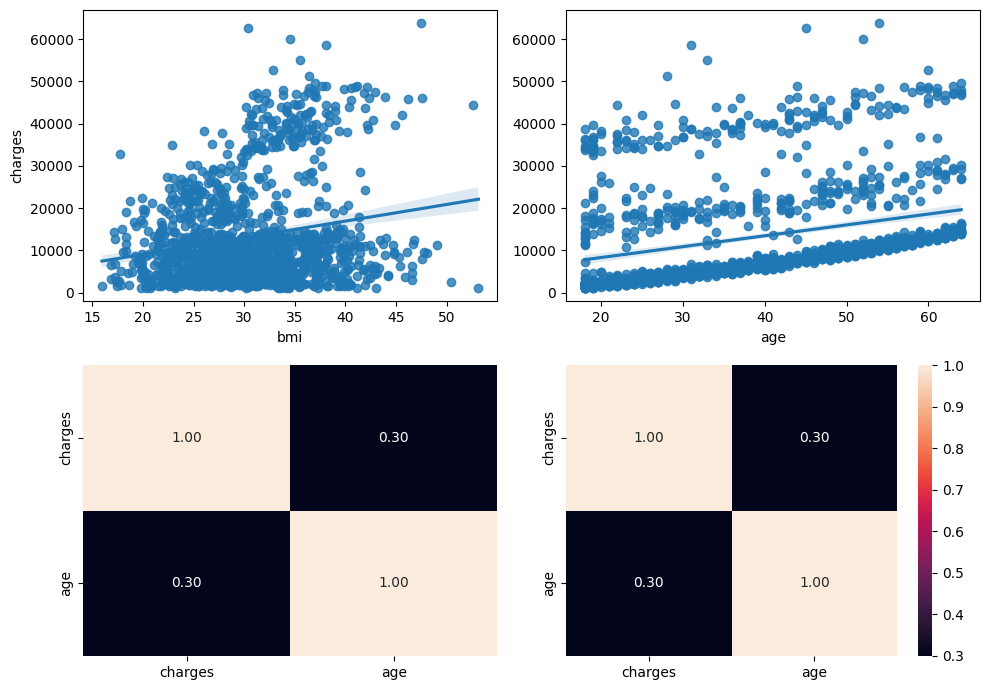

In [14]:
#Análisis numérico numerico
#Utilizaremos la variable charges para comenzar con el análisis bivariante 👉 charges vs age
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Existe una relación no muy fuerte entre la edad y el precio de la prima, es decir la significación no es muy elevada (30%)

Correlación children vs charges

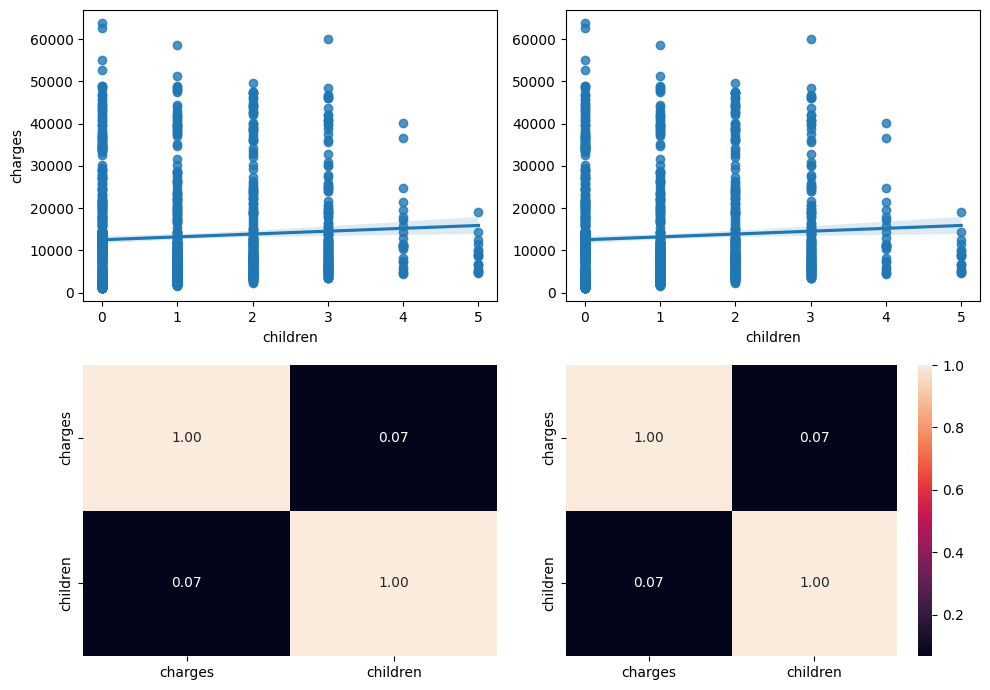

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La correlación entre el coste de la prima y si el asegurado tiene hijos es muy baja, un 7%, por tanto no resulta significativa. 

👴🧓age - 👼children
A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación

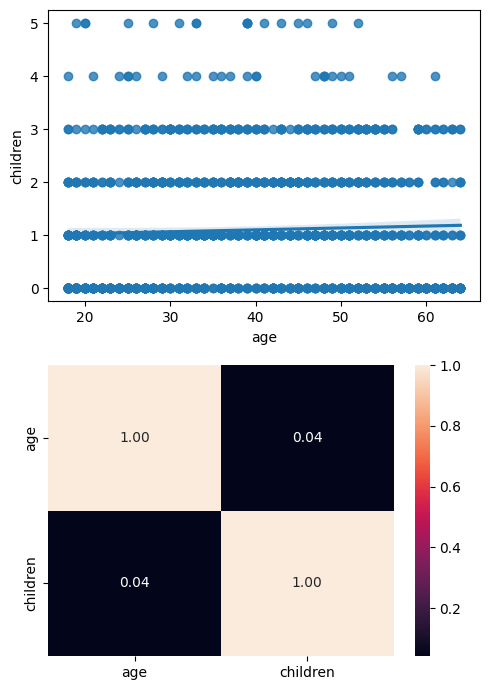

In [16]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "age", y = "children")
sns.heatmap(total_data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede determinar que no existe una relación muy fuerte entre ambas variables y que la edad no impacta sobre que el número de hijos sea mayor o no, pensándolo bien, es lógico.

In [17]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas numéricas se utilizan histogramas y combinaciones.

💰 charges - (sex, smoker, region)
Primero analizamos la clase frente a las características categóricas, una a una. Aquí no habrá combinaciones de varias predictoras y la clase

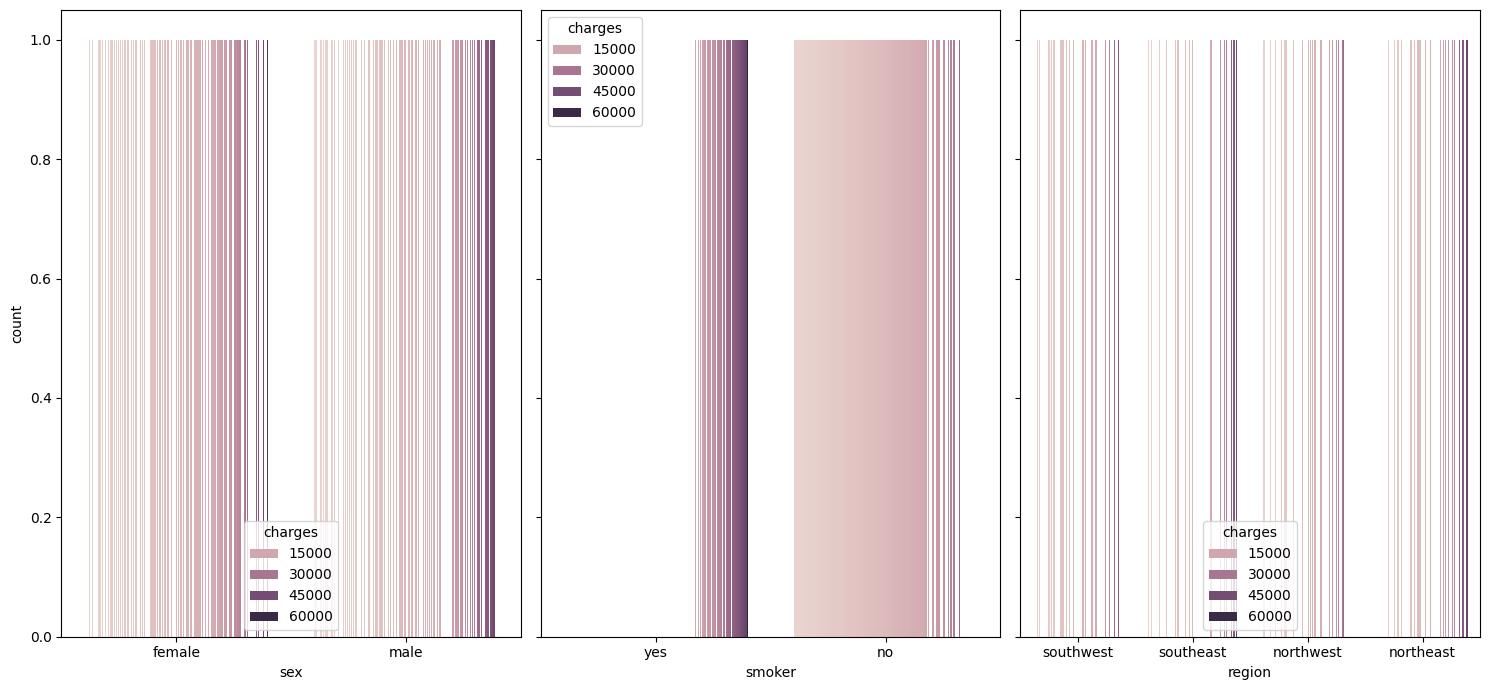

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'total_data' es tu DataFrame de pandas

fig, axis = plt.subplots(1, 3, figsize=(15, 7), sharey=True)  # Compartir eje y

sns.countplot(ax=axis[0], data=total_data, x="sex", hue="charges")
sns.countplot(ax=axis[1], data=total_data, x="smoker", hue="charges").set(ylabel=None)
sns.countplot(ax=axis[2], data=total_data, x="region", hue="charges").set(ylabel=None)

plt.tight_layout()
plt.show()


Del anterior gráfico se deriva lo siguiente:
La prima de seguro es más elevada en hombres que en mujeres
La prima del seguro es mas elevada en fumadores que en no fumadores
Las regiones con primas mas elevadas son southeast y northeast

Combinaciones de la clase con varias predictoras
Vamos a combinar sex y smoker con la variable máster para enriquecer el análisis 

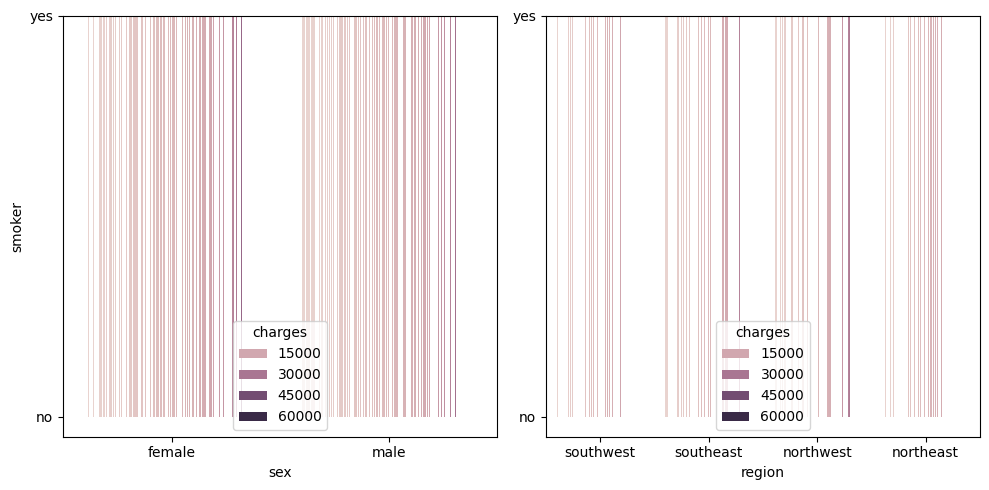

In [19]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "sex", y = "smoker", hue = "charges")
sns.barplot(ax = axis[1], data = total_data, x = "region", y = "smoker", hue = "charges").set(ylabel = None)

plt.tight_layout()

plt.show()

Análisis de correlaciones 👉 El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis

La función pd.factorize() en pandas se utiliza para realizar la codificación de factores en datos categóricos. La codificación de factores es el proceso de asignar un número entero único a cada categoría única presente en una columna de datos categóricos, nos permite realizar el análisis de correlaciones comparando valores numéricos y categóricos.

In [20]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


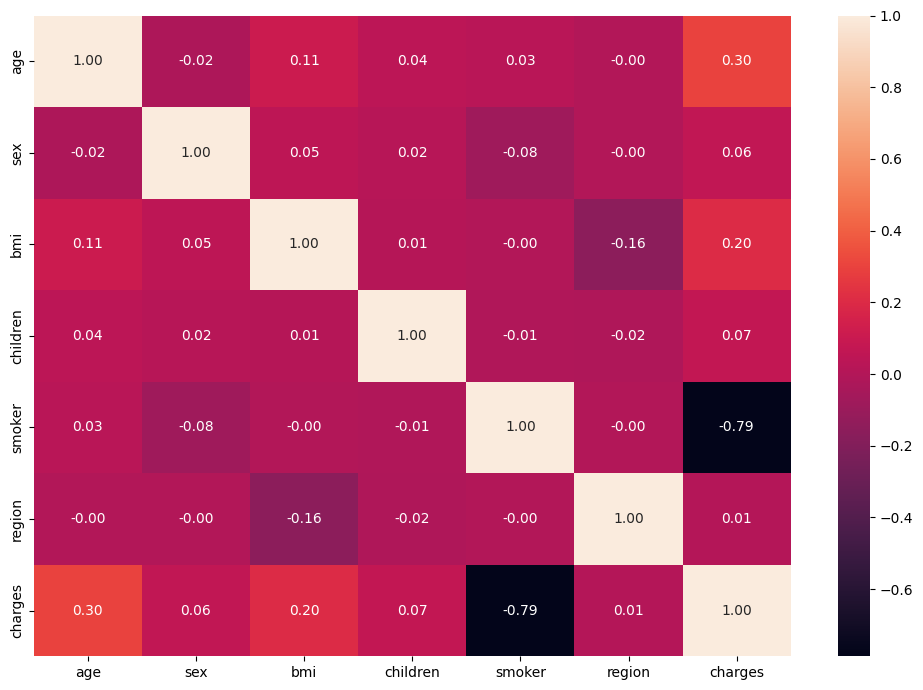

In [21]:
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data["region"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis de correlaciones refleja:
✅Existe una fuerte relación directa entre la prima(charge) y si el asegurado es fumador o no fumador (79%)
✅Existe una relación debil entre la prima(charge) y el bmi del asegurado (20%)
✅Existe una relación debil entre la prima(charge) y la edad del asegurado (30%)


Análisis numérico-categórico (completo)
Este es el análisis a mayor detalle que podemos llevar a cabo. Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones. Así, una vez comprobemos que existe alguna relación, podremos profundizar en el estudio.

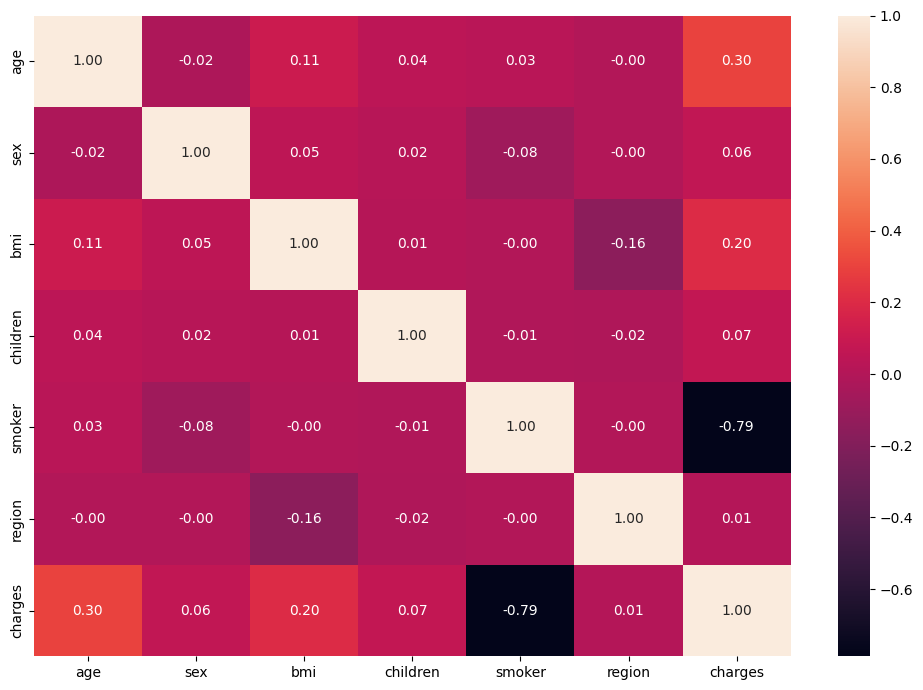

In [22]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Se confirma que existe una fuerte relación directa entre la prima(charge) y si el asegurado es fumador o no fumador (79%)

In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


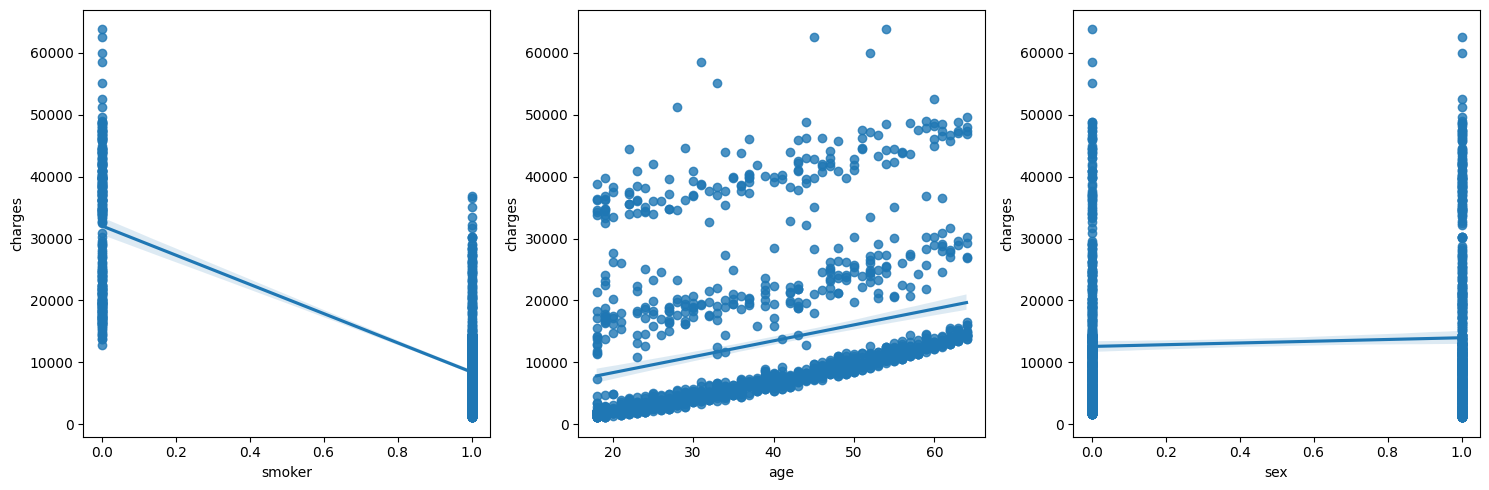

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize=(15, 5), ncols=3)

sns.regplot(ax=axis[0], data=total_data, x="smoker", y="charges")
sns.regplot(ax=axis[1], data=total_data, x="age", y="charges")
sns.regplot(ax=axis[2], data=total_data, x="sex", y="charges")

plt.tight_layout()
plt.show()


Smoker 👉 Según el coeficiente obtenido para la variable "smoker", que es -23609.57, se puede interpretar que ser fumador está asociado con un aumento en los cargos médicos (prima). Específicamente, el valor negativo del coeficiente indica que, en promedio, los cargos médicos disminuyen en $23,609.57 cuando la variable "smoker" se cambia de ser fumador a no fumador y vicevera.
Age 👉 se espera que los cargos médicos aumenten en promedio en $1,405.42 mujeres a hombres
Sex 👉 Hay una mayor correlación entre el sexo masculino y una prima mas elevada que si el cliente es mujer.


In [25]:
#Pair Plot

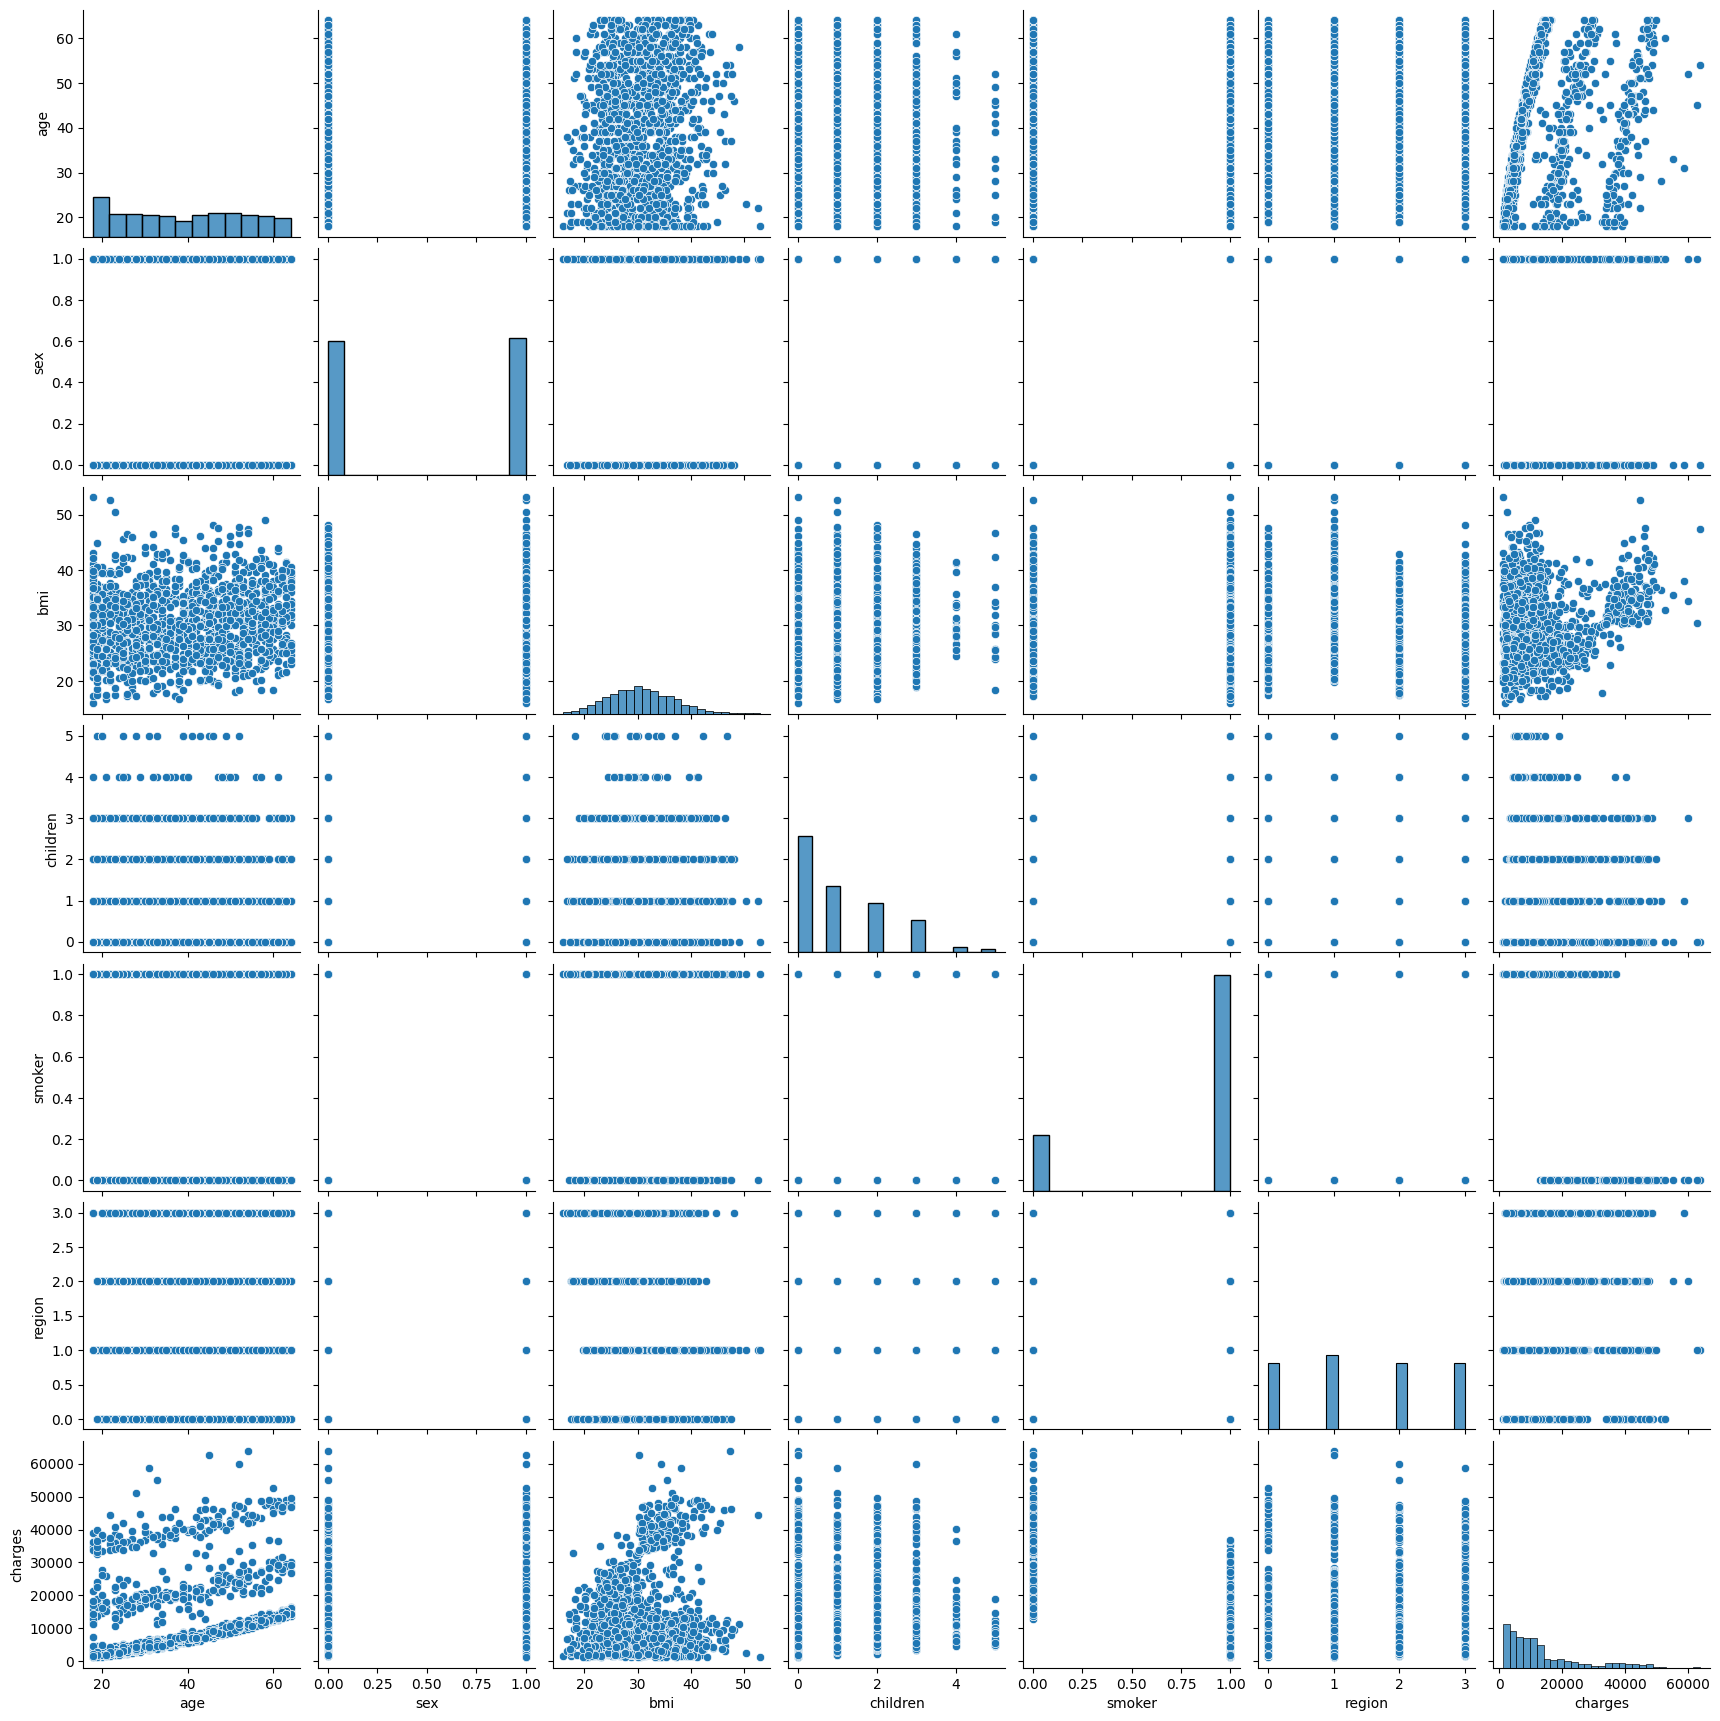

In [26]:
sns.pairplot(data = total_data)

👨‍🏫 Stage 3. Machine Learning

Antes de hacer los splits, hacemos el featuring engineering

In [27]:
#Análisis de outliers 👉 Mediante análsis descriptivo
total_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [28]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


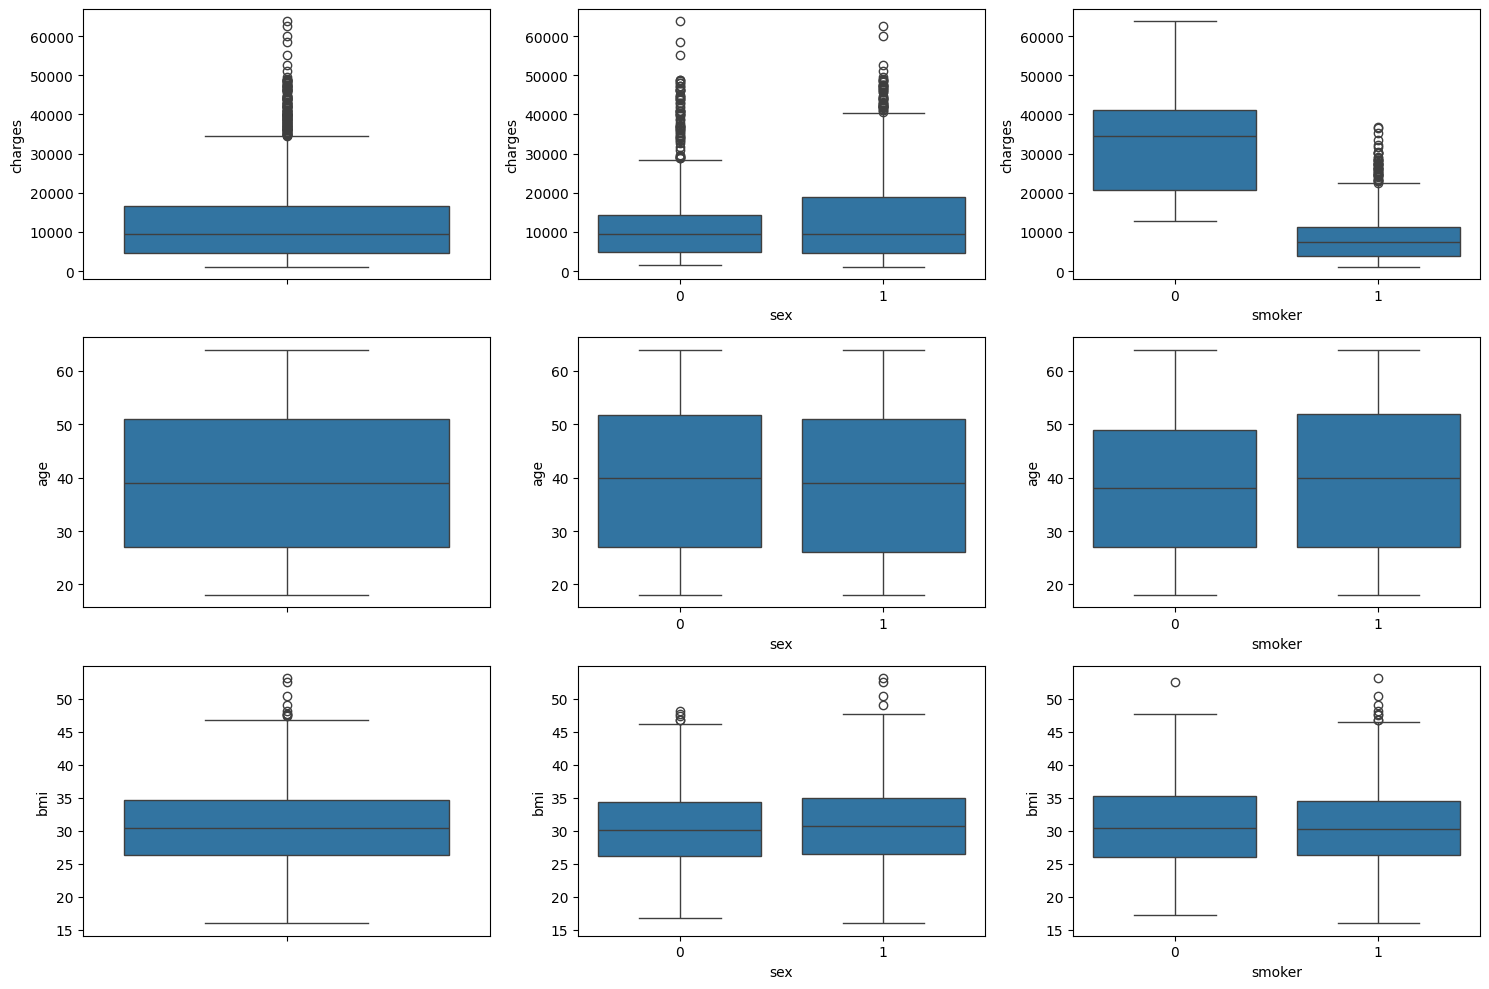

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for outliers detection
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="charges")
sns.boxplot(ax=axes[0, 1], data=total_data, x="sex", y="charges")
sns.boxplot(ax=axes[0, 2], data=total_data, x="smoker", y="charges")
sns.boxplot(ax=axes[1, 0], data=total_data, y="age")
sns.boxplot(ax=axes[1, 1], data=total_data, x="sex", y="age")
sns.boxplot(ax=axes[1, 2], data=total_data, x="smoker", y="age")
sns.boxplot(ax=axes[2, 0], data=total_data, y="bmi")
sns.boxplot(ax=axes[2, 1], data=total_data, x="sex", y="bmi")
sns.boxplot(ax=axes[2, 2], data=total_data, x="smoker", y="bmi")

plt.tight_layout()

plt.show()


No haremos limpieza de outliers siguiendo estadística (nunca, nunca se toca el dato de la columna target, en este caso es charges)

In [56]:
'''import numpy as np

stats = total_data.describe()

# Lista de variables para las cuales deseas calcular los límites
variables = ["age", "sex", "bmi", "children", "smoker", "region"]

for variable in variables:
    variable_stats = stats[variable]
    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"Para {variable}:")
    print(f"Límites superior e inferior para la búsqueda de outliers: {round(upper_limit, 2)} y {round(lower_limit, 2)}")
    print(f"Rango intercuartílico: {round(variable_iqr, 2)}\n")'''



Para age:
Límites superior e inferior para la búsqueda de outliers: 87.0 y -9.0
Rango intercuartílico: 24.0

Para sex:
Límites superior e inferior para la búsqueda de outliers: 2.5 y -1.5
Rango intercuartílico: 1.0

Para bmi:
Límites superior e inferior para la búsqueda de outliers: 47.32 y 13.67
Rango intercuartílico: 8.41

Para children:
Límites superior e inferior para la búsqueda de outliers: 5.0 y -3.0
Rango intercuartílico: 2.0

Para smoker:
Límites superior e inferior para la búsqueda de outliers: 1.0 y 1.0
Rango intercuartílico: 0.0

Para region:
Límites superior e inferior para la búsqueda de outliers: 3.5 y -0.5
Rango intercuartílico: 1.0



In [67]:
'''# Eliminación de outliers a partir del rango intercuartílico

# Eliminar outliers para age
total_data = total_data[(total_data['age'] >= -9.0) & (total_data['age'] <= 87.0)]

# Eliminar outliers para sex
total_data = total_data[(total_data['sex'] >= -1.5) & (total_data['sex'] <= 2.5)]

# Eliminar outliers para bmi
total_data = total_data[(total_data['bmi'] >= 13.67) & (total_data['bmi'] <= 47.32)]

# Eliminar outliers para children
total_data = total_data[(total_data['children'] >= -3.0) & (total_data['children'] <= 5.0)]

# Eliminar outliers para smoker
total_data = total_data[(total_data['smoker'] >= 1.0) & (total_data['smoker'] <= 1.0)]

# Eliminar outliers para region
total_data = total_data[(total_data['region'] >= -0.5) & (total_data['region'] <= 3.5)]'''


In [30]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


Análisis de valores faltantes
Un valor faltante (missing value) es un espacio que no tiene valor asignado en la observación de una variable específica.

In [31]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

👀 Observamos que no hay valores nulos y no se va a realizar inferencia de nuevas características

In [32]:
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Repetir split

Dividir el conjunto de datos en train y test y guardarlos 👉 Hay que incluir un random state. Hay que hacer un split estratificado con stratify, para que tome la misma proporcion de 0s y de 1s en el split, se hace asi:

from sklearn.model_selection import train_test_split

X = ...
y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

No empleamos stratify, ya que  hay al menos una clase en tus etiquetas (y) que tiene solo un miembro, y esto está causando un problema al intentar estratificar los conjuntos de datos.

In [33]:
'''from sklearn.model_selection import train_test_split

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

# Dividir el conjunto de datos en muestras de entrenamiento y prueba
X = total_data.drop("charges", axis=1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
X_train.to_csv("insurance_train_X.csv", index=False)
X_test.to_csv("insurance_test_X.csv", index=False)

# Guardar las etiquetas de los conjuntos de entrenamiento y prueba en archivos de texto
with open("insurance_train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))

with open("insurance_test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))

X_train.head()'''


from sklearn.model_selection import train_test_split
import pandas as pd

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]


# Dividir el conjunto de datos en muestras de entrenamiento y prueba
X = total_data.drop("charges", axis=1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
X_train.to_csv("insurance_train_X.csv", index=False)
X_test.to_csv("insurance_test_X.csv", index=False)

# Guardar las etiquetas de los conjuntos de entrenamiento y prueba en archivos CSV
y_train.to_csv("insurance_train_y.csv", index=False)
y_test.to_csv("insurance_test_y.csv", index=False)

X_train.head()


,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,1,3
968,21,1,25.745,2,1,3
599,52,0,37.525,2,1,2
170,63,1,41.470,0,1,1
275,47,0,26.600,2,1,3


💥División del conjuno de datos train y test tras normalización de características utilizando el StandardScaler. 

✅En esta caso como es ua regression es normal tener niveles negativos y positivos. Si fuera una clasificación no se pueden tener negativos.

In [33]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pickle import dump

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

# Seleccionar características (X) y etiquetas (y)
X = total_data[num_variables]
y = total_data["charges"]

# Dividir el conjunto de datos en muestras de entrenamiento y prueba con random_state y stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #no accepta stratificación ya que  que hay una clase en tus etiquetas (y) que tiene solo un miembro, y esto está causando un problema al intentar estratificar los conjuntos de datos
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar y ajustar el escalador en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# Transformar el conjunto de entrenamiento y prueba
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

# Guardar los conjuntos de entrenamiento y prueba normalizados en archivos CSV
X_train_norm.to_csv("insurance_train_X_norm.csv", index=False)
X_test_norm.to_csv("insurance_test_X_norm.csv", index=False)

# Guardar el escalador para su uso posterior
dump(scaler, open("norm_scaler_insurance.pk", "wb"))

X_train_norm.head()


,age,sex,bmi,children,smoker,region
1114,-1.157680,0.971409,-0.996928,-0.907908,0.500292,1.383946
968,-1.300619,0.971409,-0.792762,0.766904,0.500292,1.383946
599,0.914926,-1.029432,1.154664,0.766904,0.500292,0.477983
170,1.701087,0.971409,1.806837,-0.907908,0.500292,-0.427981
275,0.557580,-1.029432,-0.651417,0.766904,0.500292,1.383946


Normalizacion Min Max

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pickle import dump

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

# Seleccionar características (X) y etiquetas (y)
X = total_data[num_variables]
y = total_data["charges"]

# Dividir el conjunto de datos en muestras de entrenamiento y prueba con random_state y stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #no acepta stratificación, ya que hay una clase en tus etiquetas (y) que tiene solo un miembro, y esto está causando un problema al intentar estratificar los conjuntos de datos. En el contexto de train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el objeto MinMaxScaler
minmax_scaler = MinMaxScaler()

# Ajustar el escalador con los datos de entrenamiento
minmax_scaler.fit(X_train)

# Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train_minmax = minmax_scaler.transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=num_variables)

X_test_minmax = minmax_scaler.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=num_variables)

# Guardar los conjuntos normalizados en archivos CSV
X_train_minmax.to_csv("insurance_train_X_minmax.csv", index=False)
X_test_minmax.to_csv("insurance_test_X_minmax.csv", index=False)

# Guardar el escalador min-max
dump(minmax_scaler, open("minmax_scaler_insurance.pk", "wb"))

X_train_minmax.head()


,age,sex,bmi,children,smoker,region
1114,0.108696,1.0,0.230024,0.0,1.0,1.000000
968,0.065217,1.0,0.263250,0.4,1.0,1.000000
599,0.739130,0.0,0.580172,0.4,1.0,0.666667
170,0.978261,1.0,0.686306,0.0,1.0,0.333333
275,0.630435,0.0,0.286252,0.4,1.0,1.000000


Se debe emplear regresión, ya que el problema no se clasifica, sino que implica predecir un valor continuo o una cantidad numérica.

Seguir por aqui
👇👇👇👇👇👇👇👇 https://colab.research.google.com/drive/1o5A5dNhamjcOEgaA9FKM4OmlAZS84Z5o#scrollTo=DektPtmQst-H

El modelo de regresión lineal utiliza datos normalizados de un conjunto de entrenamiento para predecir etiquetas en un conjunto de prueba en el contexto de un proyecto de seguros de salud. El código ajusta el modelo, imprime sus coeficientes y intercepto, realiza predicciones, evalúa el rendimiento mediante el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2), y guarda el modelo entrenado para uso futuro.

In [37]:
#okk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import pickle

# Cargar las características normalizadas y las etiquetas
X_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_train_X_norm.csv")
X_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_test_X_norm.csv")
y_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_train_y.csv")
y_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_test_y.csv")

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Imprimir el intercepto y los coeficientes
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Opcional: Visualizar las predicciones frente a los valores reales
predictions_vs_actuals = pd.DataFrame({"Actual": y_test["charges"].values, "Predicted": y_pred.flatten()})
print(predictions_vs_actuals.head())

# Guardar el modelo en un archivo con pickle
with open("/workspace/Linear-Regression-Insurance-Project/models/linear_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Modelo guardado exitosamente.")


Intercepto (a): [13030.20336929]
Coeficientes (b): [[ 3480.71806706   -49.82673307  1890.9752842    637.82776712
  -9224.0941585    262.2899979 ]]
Error cuadrático medio (MSE): 35493102.61165053
Coeficiente de determinación (R^2): 0.8068466322629111
        Actual     Predicted
0   8688.85885   8080.450186
1   5708.86700   5592.871120
2  11436.73815  14378.298655
3  38746.35510  31731.819541
4   4463.20510   9158.356944
Modelo guardado exitosamente.


🚀Performance del modelo:

✅Error Cuadrático Medio (MSE):
MSE = 35,493,102.61
El MSE mide el promedio de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo. En este caso, un MSE de esta magnitud indica que hay una variabilidad relativamente alta en las predicciones.

✅Coeficiente de Determinación (R^2):
R^2 = 0.8068
El R^2 representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R^2 de 0.8068 sugiere que el modelo explica aproximadamente el 80.68% de la variabilidad en la carga. Este valor es bastante bueno, pero aún hay un 19.32% de variabilidad no explicada.

Optimización del modelo

El código utiliza GridSearchCV para optimizar un modelo de regresión lineal con selección de características. Encuentra el mejor número de características (6 en este caso) y evalúa el rendimiento del modelo utilizando el Error Cuadrático Medio (MSE) en los datos de entrenamiento y el Coeficiente de Determinación (R^2) en los datos de prueba.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import pandas as pd
import pickle

# Cargar el modelo previamente entrenado
with open("/workspace/Linear-Regression-Insurance-Project/models/linear_regression_model.pkl", "rb") as model_file:
    pre_trained_model = pickle.load(model_file)

# Definir el pipeline con SelectKBest y LinearRegression
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_regression, k=5)),
    ('model', LinearRegression())
])

# Definir los parámetros a explorar
params = {
    'selector__k': [int(X_train.shape[1] * p) for p in [1, 0.8, 0.7, 0.6, 0.5]],
    # Otros hiperparámetros de LinearRegression si es necesario
}

# Definir la métrica de evaluación con neg_mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inicializar GridSearchCV con el modelo previamente entrenado
grid_search = GridSearchCV(pipeline, params, cv=5, scoring=scorer, n_jobs=-1, refit=True)
grid_search.best_estimator_ = pre_trained_model

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_val_pred = grid_search.predict(X_val)

# Calcular el R^2 en el conjunto de prueba
r2_val = r2_score(y_val, y_val_pred)

# Imprimir los mejores parámetros y rendimiento
print("Mejores parámetros:", grid_search.best_params_)
print("Error cuadrático medio (MSE) en entrenamiento:", -grid_search.best_score_)
print("Coeficiente de determinación (R^2) en prueba:", r2_val)

# Guardar el modelo optimizado
best_model = grid_search.best_estimator_
with open("linear_regression_best_model_optimized.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)



/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A colu

Mejores parámetros: {'selector__k': 6}
Error cuadrático medio (MSE) en entrenamiento: 38772491.930011496
Coeficiente de determinación (R^2) en prueba: 0.728976932063333


Mejores parámetros: {'selector__k': 6}

Optimalidad alcanzada con la selección de 6 características por SelectKBest.

Performance de entrenamiento
Error cuadrático medio (MSE) en entrenamiento: 38772491.93

El modelo tiene un MSE de aproximadamente 38.7 millones en los datos de entrenamiento, indicando la discrepancia entre las predicciones y los valores reales.

Performance de prueba
Coeficiente de determinación (R^2) en prueba: 0.73

El modelo explica alrededor del 73% de la variabilidad en el conjunto de prueba.

Conclusión:

🚀 Performance del Modelo:

✅ Error Cuadrático Medio (MSE):
MSE = 35,493,102.61
El MSE, con un valor de 35,493,102.61, indica una variabilidad relativamente alta en las predicciones del modelo. Cuanto más bajo sea el MSE, mejor será la capacidad del modelo para ajustarse a los datos.

✅Coeficiente de Determinación (R^2):
R^2 = 0.8068
Un R^2 de 0.8068 sugiere que el modelo explica aproximadamente el 80.68% de la variabilidad en la carga. Este valor es bastante sólido, pero aún queda un 19.32% de variabilidad no explicada.

🚀Optimización del Modelo:

✅Mejores Parámetros:
{'selector__k': 6}
Optimalidad alcanzada con la selección de 6 características por SelectKBest.

✅Performance de Entrenamiento:
Error cuadrático medio (MSE) en entrenamiento: 38,772,491.93
El modelo tiene un MSE de aproximadamente 38.7 millones en los datos de entrenamiento, indicando la discrepancia entre las predicciones y los valores reales.
Performance de Prueba:

✅Coeficiente de determinación (R^2) en prueba: 0.73
El modelo explica alrededor del 73% de la variabilidad en el conjunto de prueba. Un R^2 de este nivel es positivo, aunque deja espacio para mejorar la capacidad predictiva del modelo.

Conclusión:

El modelo de regresión lineal desarrollado muestra un rendimiento sólido en la estimación de cargos de seguro de salud, aunque hay áreas que podrían mejorarse. El Error Cuadrático Medio (MSE) de 35,493,102.61 indica una variabilidad considerable en las predicciones, sugiriendo que hay margen para refinar la precisión del modelo. El Coeficiente de Determinación (R^2) del 80.68% es alentador, pero aún queda un 19.32% de variabilidad no explicada.

La selección óptima de características con SelectKBest, utilizando 6 características, muestra una adaptación eficiente del modelo. Sin embargo, el rendimiento en datos de entrenamiento con un MSE de 38,772,491.93 destaca la necesidad de ajustes adicionales.

En conjunto, el modelo presenta una base sólida, pero se sugiere explorar estrategias para reducir la variabilidad y mejorar la capacidad predictiva. La optimización de hiperparámetros y la consideración de características adicionales podrían ser áreas fructíferas para futuras mejoras.